# Import Library and Read Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# read dataset
customer = pd.read_csv('customer.csv', sep =';')
product = pd.read_csv('product.csv', sep =';')
store = pd.read_csv('store.csv', sep =';')
transaction = pd.read_csv('transaction.csv', sep =';')

In [ ]:
customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [ ]:
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [ ]:
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [ ]:
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


# Data Cleansing

## Check Data Type & Duplicate Data

### Customer

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [ ]:
# Check for duplicated rows
print('Number of duplicated rows:', customer.duplicated().sum())

Number of duplicated rows: 0


- Dataset memiliki 447 baris dan 5 fitur
- Tipe data : object dan int64
- Tidak terdapat data duplikat

**To do:** merubah tipe data income menjadi float

In [ ]:
# change data type "income"
customer["Income"] = customer["Income"].str.replace(",", ".").astype(float)

### Product

In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [ ]:
# Check for duplicated rows
print('Number of duplicated rows:', product.duplicated().sum())

Number of duplicated rows: 0


- Dataset memiliki 10 baris dan 3 fitur
- Tipe data : object dan int64
- Tidak terdapat data duplikat

### Store

In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [ ]:
# Check for duplicated rows
print('Number of duplicated rows:', store.duplicated().sum())

Number of duplicated rows: 0


- Dataset memiliki 14 baris dan 6 fitur
- Tipe data : object dan int64
- Tidak terdapat data duplikat

**To do:** merubah tipe data Latitude dan Longtitude menjadi float

In [ ]:
# change data type "Latitude" and "Longtitude"
store["Latitude"] = store["Latitude"].str.replace(",", ".").astype(float)
store["Longitude"] = store["Longitude"].str.replace(",", ".").astype(float)

### Transaction

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [ ]:
# Check for duplicated rows
print('Number of duplicated rows:', transaction.duplicated().sum())

Number of duplicated rows: 0


- Dataset memiliki 5020 baris dan 8 fitur
- Tipe data : object dan int64
- Tidak terdapat data duplikat

**To do:** merubah tipe data Date menjadi datetime

In [ ]:
# change data type column Date to datetime
from datetime import datetime
transaction['Date'] = pd.to_datetime(transaction['Date'],format='%d/%m/%Y')
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4


## Check & Handle Missing Values

### Customer

In [ ]:
customer.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

- Terdapat missing/null value pada fitur Marital Status
- Nilai null pada Marital Status akan di drop, karena kuran dari 10% data

In [ ]:
# Handling null values 'Marital Status'
customer.dropna(subset=['Marital Status'], inplace=True)

In [ ]:
customer.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

### Product

In [ ]:
product.isna().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

Tidak terdapat missing/null value pada tabel product

### Store

In [ ]:
store.isna().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

Tidak terdapat missing/null value pada tabel store

### Transaction

In [ ]:
transaction.isna().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

Tidak terdapat missing/null value pada tabel transaction

# Merge All Table

Setiap tabel memiliki kolom yang berinisial ID, yaitu CustomerID, ProductID, StoreID, TransactionID.
Disini menggunakan Tabel Transaction untuk menjadi pilar karena pada tabel tersebut memiliki ke-4 kolom berinisial ...ID.

In [ ]:
# Merge Customer ke Transaction menjadi df1
df1 = pd.merge(transaction, customer, on=['CustomerID'])

# Merge Store ke df1 menjadi df2
df2 = pd.merge(df1, store, on=['StoreID'])

# Merge Product ke df2 menjadi df
df = pd.merge(df2, product.drop(columns=['Price']), on=['ProductID'])

In [ ]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,4.74,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,9.94,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers


# Regression

## Import Library Regression

In [ ]:
! pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.5 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

## Forecasting Data

Menggabungkan semua kolom menjadi Date dan Qty untuk bisa diprediksi time series

In [ ]:
df_forecast = df[['Date','Qty']]
df_forecast = df_forecast.groupby('Date')[['Qty']].sum()
df_forecast.head(5)

,Qty
Date,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,28


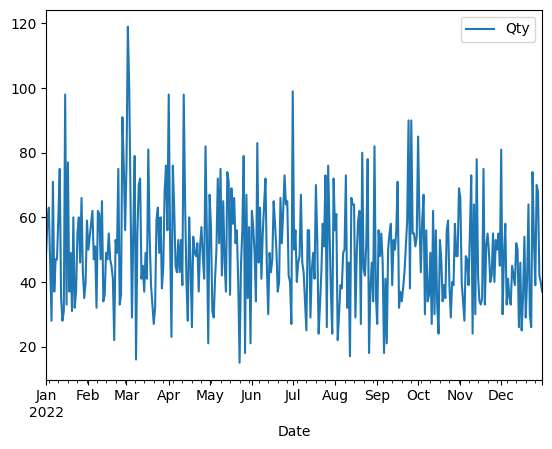

In [ ]:
# Plot the quantity based on date
df_forecast.plot()
plt.show()

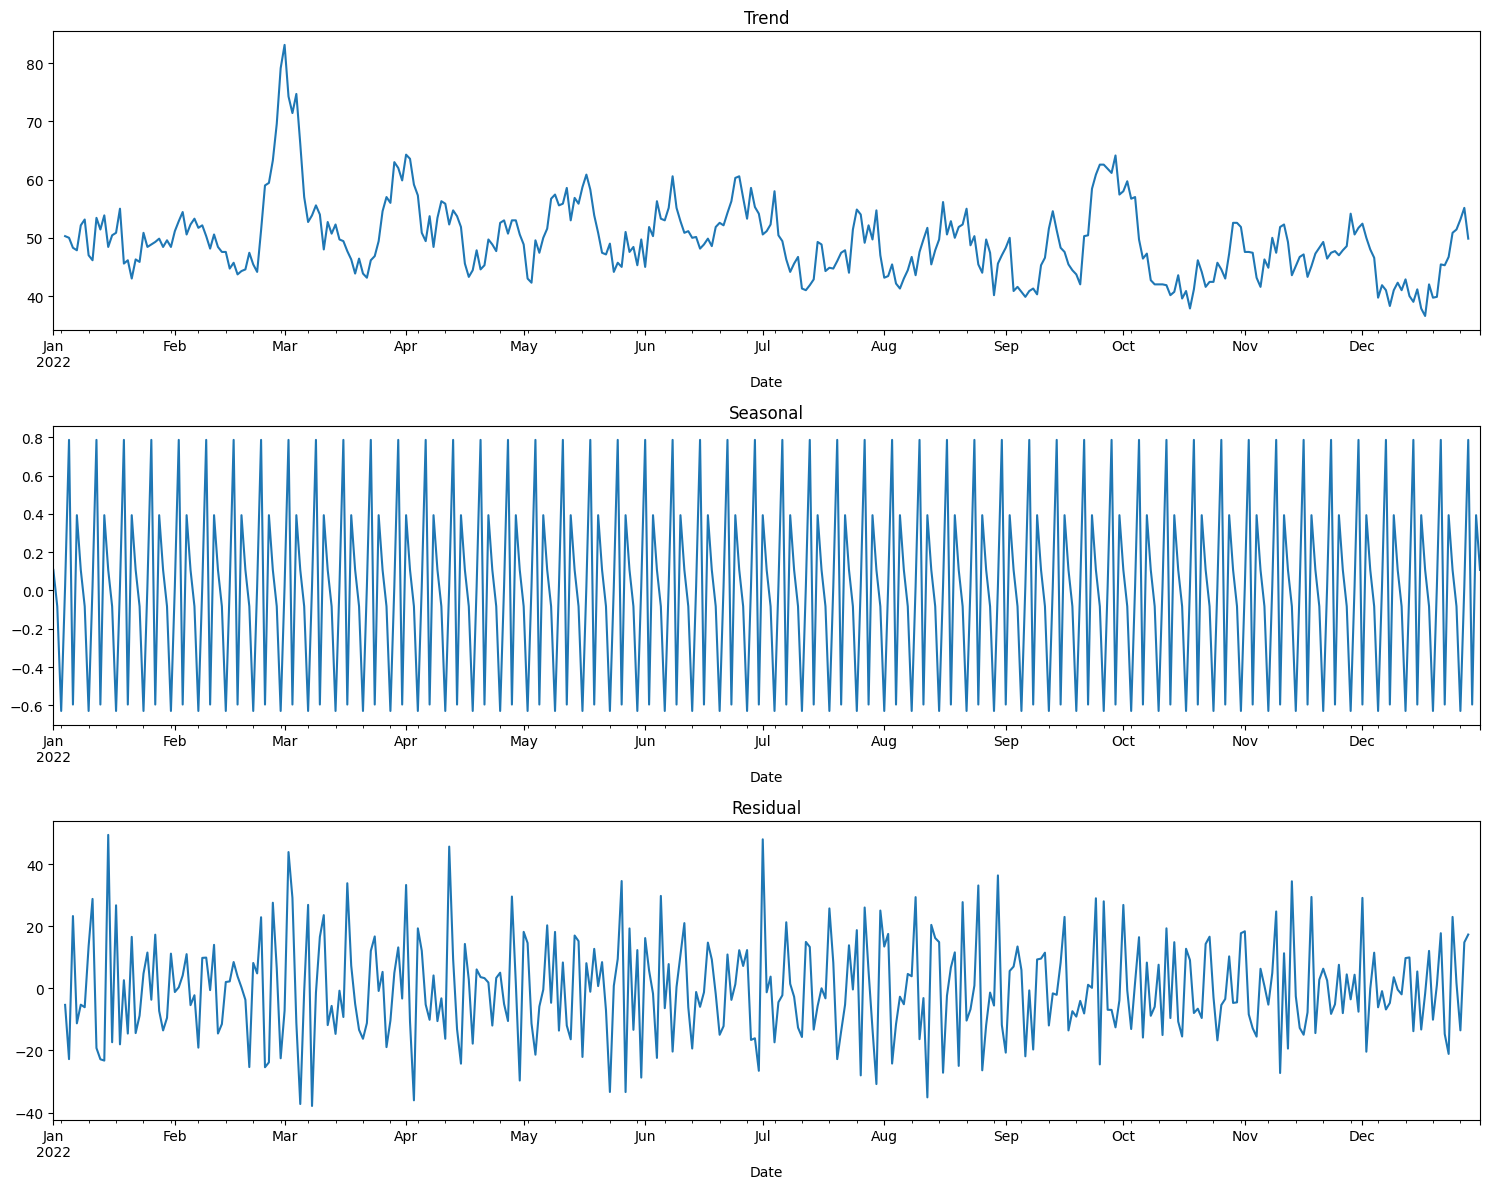

In [ ]:
decompose = seasonal_decompose(df_forecast)

fig,ax = plt.subplots(3,1,figsize=(15,12))
decompose.trend.plot(ax=ax[0])
ax[0].set_title('Trend')
decompose.seasonal.plot(ax=ax[1])
ax[1].set_title('Seasonal')
decompose.resid.plot(ax=ax[2])
ax[2].set_title('Residual')

plt.tight_layout()
plt.show()

## Check Stationarity Data

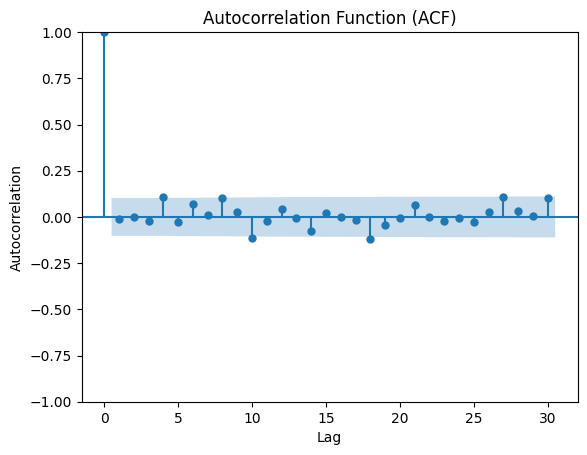

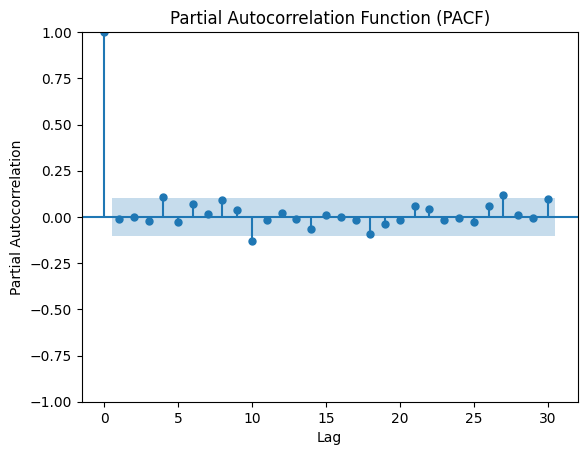

In [ ]:
# Plot ACF using default method
plot_acf(df_forecast, lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF using ywm method
plot_pacf(df_forecast, lags=30,  method='ywm')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [ ]:
# Check if the data stationary or not
df_check_stat = adfuller(df_forecast)
print('ADF Statistic: %f' % df_check_stat[0])
print('P-Value: %f' % df_check_stat[1])
for key, value in df_check_stat[4].items():
  print('Critical Values:')
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.248302
P-Value: 0.000000
Critical Values:
	1%: -3.448
Critical Values:
	5%: -2.870
Critical Values:
	10%: -2.571


Dapat dilihat bahwa setelah dilakukan cek menggunakan adfuller menunjukkan ADF statistics < Critical values dan P value < 0.05 maka data tersebut sudah stationary

## Data Modelling

In [ ]:
# Split the data into training and testing sets
cut_off = round(df_forecast.shape[0] * 0.8)
df_train = df_forecast[:cut_off]
df_test = df_forecast[cut_off:]

# Check the shapes of the train and test sets
print("Training set shape:", df_train.shape)
print("Testing set shape:", df_test.shape)

Training set shape: (292, 1)
Testing set shape: (73, 1)


In [ ]:
df_train

,Qty
Date,
2022-01-01,49
2022-01-02,59
2022-01-03,63
2022-01-04,45
2022-01-05,28
...,...
2022-10-15,33
2022-10-16,24
2022-10-17,53


In [ ]:
df_test

,Qty
Date,
2022-10-20,39
2022-10-21,35
2022-10-22,56
2022-10-23,59
2022-10-24,39
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


In [ ]:
# check which ARIMA models best suit using auto ARIMA
auto_arima_model = auto_arima(df_train['Qty'], seasonal=False, stepwise=False, suppress_warnings=True, trace = True)
auto_arima_model.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3154.015, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2967.924, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2854.318, Time=0.25 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2815.561, Time=0.29 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=2753.494, Time=0.24 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=2739.996, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2686.138, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2509.752, Time=1.08 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=2511.101, Time=0.62 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2615.212, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2508.280, Time=0.18 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(3,0,0)(0,0,0)[0]       

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1249.140
Date:                Sat, 02 Sep 2023   AIC                           2508.280
Time:                        06:18:32   BIC                           2526.663
Sample:                    01-01-2022   HQIC                          2515.643
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1255      0.224      0.559      0.576      -0.314       0.565
ar.L2          0.8745      0.224      3.897      0.000       0.435       1.314
ma.L1         -0.1496      0.248     -0.604      0.546      -0.635       0.336
ma.L2         -0.8249      0.248     -3.332      0.001      -1.310      -0.340
sigma2       298.5814     22.236     13.428      0.000     255.000     342.163
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                19.39
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.54
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Berdasarkan auto ARIMA model yang terbaik adalah dengan order (2, 0, 2)

In [ ]:
# Function to calculate RMSE
def rmse(y_actual, y_pred):
  print(f'RMSE value {mean_squared_error(y_actual, y_pred)**0.5}')

# Function to eval machine learning modelling
def eval(y_actual, y_pred):
  print(f'MAE value {mean_absolute_error(y_actual, y_pred)}')

In [ ]:
# ARIMA Modelling
y = df_train['Qty']
model = ARIMA(y, order = (2, 0, 2))
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Model Prediction
pred = model.get_forecast(len(df_test))
pred_df = pred.conf_int()
pred_df['predictions'] = model.predict(start = pred_df.index[0], end = pred_df.index[-1])
pred_df.index = df_test.index
pred_out = pred_df['predictions']

In [ ]:
# Evaluate the model
rmse(df_test['Qty'], pred_out)
eval(df_test['Qty'], pred_out)

RMSE value 14.46159930733353
MAE value 12.363924618445024


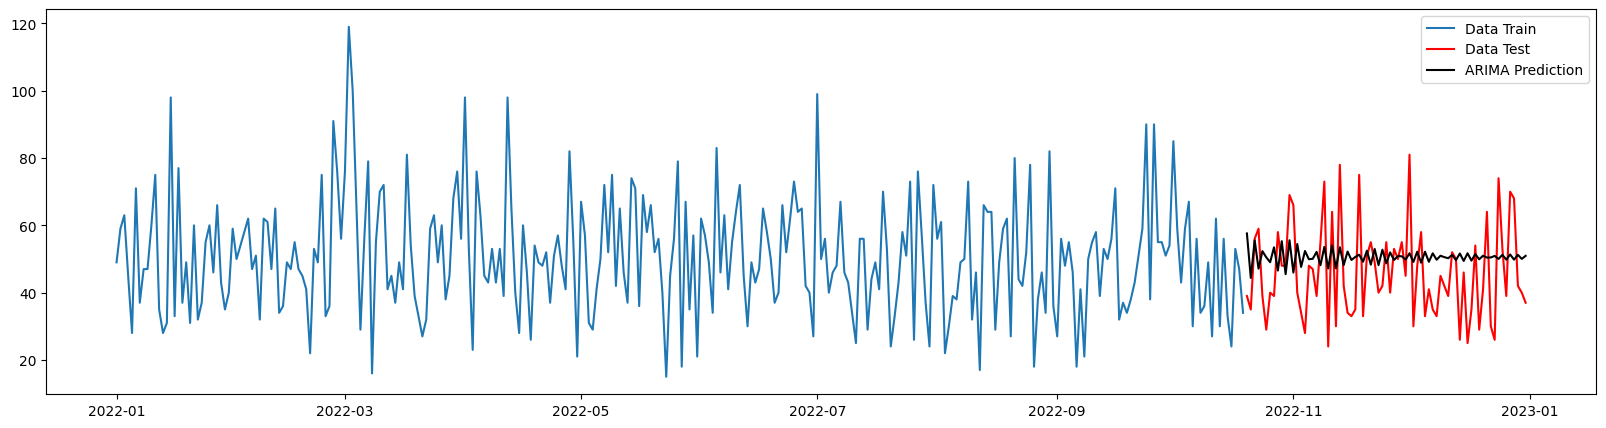

In [ ]:
# Plot
plt.figure(figsize=(20, 5))
plt.plot(df_train['Qty'], label='Data Train')
plt.plot(df_test['Qty'], color='red', label='Data Test')
plt.plot(pred_out, color='black', label='ARIMA Prediction')
plt.legend()

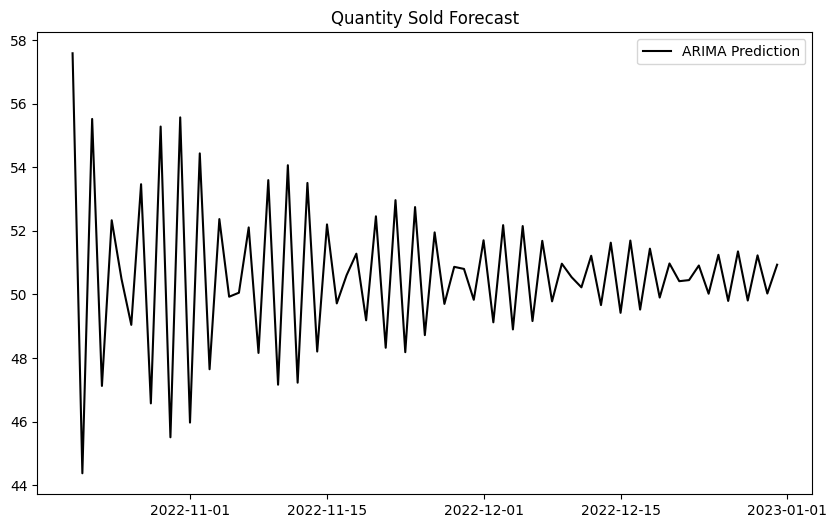

In [ ]:
# Plot and Visualize Predicted Values for Quantity Sold
plt.figure(figsize=(10, 6))
plt.plot(pred_out, color='black', label='ARIMA Prediction')
plt.title('Quantity Sold Forecast')
plt.legend()
plt.show()

In [ ]:
# Check Mean Quantity Sold per Day
mean_qty_sold = pred_out.mean().round()
print(f"Mean Quantity Sold Per day: {mean_qty_sold}")

Mean Quantity Sold Per day: 51.0


Dari perkiraan rata-rata jumlah produk yang terjual pada bulan Januari 2023 adalah 51 produk/hari

## Forecast Each Product Quantity

In [ ]:
unique_product = df['Product Name'].unique()
product_pred = pd.DataFrame()

# loop to get forecasts for each product
for product_name in unique_product:
    product_data = df[df['Product Name'] == product_name]

    product_data['Date'] = pd.to_datetime(product_data['Date'])
    product_data.set_index('Date', inplace=True)
    product_data = product_data.resample('D').sum().fillna(0)

    # fit model and get forecasts
    model = ARIMA(product_data['Qty'], order=(2, 0, 2))
    model_fit = model.fit()
    forecast_steps = df_test.shape[0]
    forecast = model_fit.get_forecast(steps=forecast_steps)

    # add forecasted values to dataframe
    forecast_mean = forecast.predicted_mean
    product_pred[product_name] = forecast_mean

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
product_pred

,Crackers,Yoghurt,Ginger Candy,Cheese Stick,Thai Tea,Choco Bar,Oat,Potato Chip,Coffee Candy,Cashew
2023-01-01,4.270630,5.611637,7.009445,4.955239,8.177957,5.866347,2.232713,2.693304,5.078197,1.798705
2023-01-02,4.510776,4.929329,7.147772,4.978128,8.113921,6.510630,2.984536,2.477286,5.455853,2.050480
2023-01-03,4.442286,5.677931,7.057637,4.978447,8.056793,7.513407,2.567272,3.214132,5.835647,2.029656
2023-01-04,4.653320,5.018050,7.143231,4.978524,8.009018,6.607175,2.469314,3.519851,6.146561,1.766324
2023-01-05,4.566921,5.606514,7.089702,4.978522,7.967997,5.891858,2.820053,2.835798,6.338678,1.476414
...,...,...,...,...,...,...,...,...,...,...
2023-03-10,4.927501,5.329394,7.160057,4.978523,7.732342,6.964754,2.632395,2.794791,5.690105,1.722933
2023-03-11,4.989982,5.329064,7.160058,4.978523,7.732340,6.638002,2.632395,3.207338,5.690193,1.767916
2023-03-12,4.928294,5.329358,7.160058,4.978523,7.732339,6.414264,2.632395,3.207465,5.692705,1.769256
2023-03-13,4.989204,5.329096,7.160059,4.978523,7.732339,6.793605,2.632395,2.802710,5.696890,1.728159


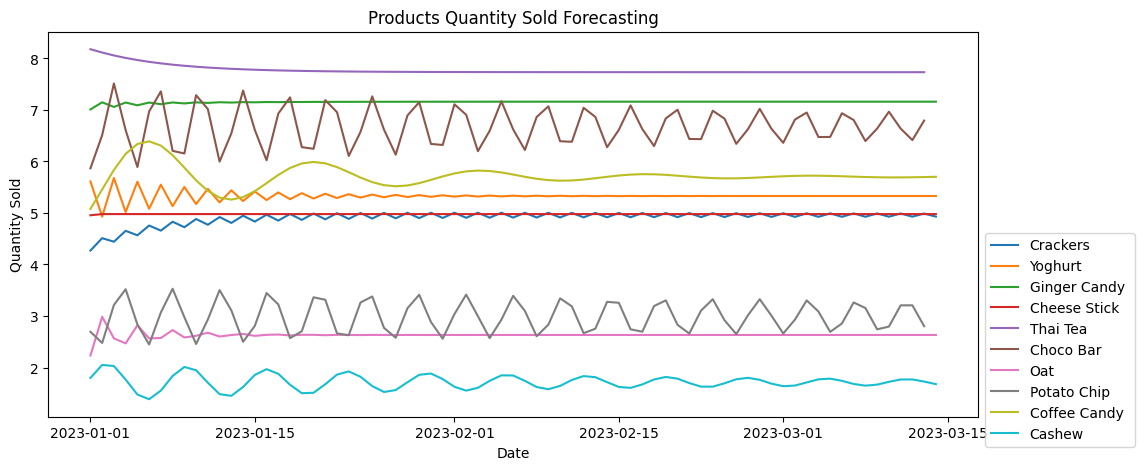

In [ ]:
# Plot forecasting
plt.figure(figsize=(12, 5))
for i in product_pred.columns:
    plt.plot(product_pred.index, product_pred[i], label=i)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.2))
plt.title('Products Quantity Sold Forecasting')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

In [ ]:
# get the average units sold for each product
product_avg_qty = product_pred.mean().round()
print(product_avg_qty)

Crackers         5.0
Yoghurt          5.0
Ginger Candy     7.0
Cheese Stick     5.0
Thai Tea         8.0
Choco Bar        7.0
Oat              3.0
Potato Chip      3.0
Coffee Candy     6.0
Cashew           2.0
dtype: float64


In [ ]:
product_avg_qty.sum()

51.0

Seperti yang telah dihitung sebelumnya, memasuki tahun 2023, model memperkirakan rata-rata total 51 unit/hari dengan jumlah penjualan harian untuk setiap produk sebagai berikut:<br>

- Crackers : 5 unit
- Yoghurt: 5 unit
- Ginger Candy: 7 unit
- Cheese Stick : 5 unit
- Thai tea : 8 unit
- Choco Bar : 7 unit
- Oat : 3 unit
- Potato Chip : 3 unit
- Coffee Candy : 6 unit
- Cashew : 2 unit <br>

Data di atas dapat digunakan sebagai panduan untuk memenuhi permintaan saat menimbun persediaan. Ke depannya, prediksi ini harus diuji terhadap penjualan aktual dan disesuaikan untuk mengoptimalkan penjualan dan mengurangi pemborosan.

# Clustering

## Import Library Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

In [ ]:
# read dataset
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,StoreName,GroupStore,Type,Latitude,Longitude,Product Name
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,4.74,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,9.94,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,Crackers


In [ ]:
# Identified columns with high correlation
df.corr()

,CustomerID,Price,Qty,TotalAmount,StoreID,Age,Gender,Income,Latitude,Longitude
CustomerID,1.000000,-0.014821,-0.012024,-0.025266,0.005470,-0.021120,-0.015863,0.005440,0.005166,-0.004492
Price,-0.014821,1.000000,-0.354614,0.440046,-0.031782,0.013781,0.012132,0.000636,-0.027438,0.017238
Qty,-0.012024,-0.354614,1.000000,0.620804,0.012169,-0.026745,-0.011920,-0.027724,-0.007179,0.006805
TotalAmount,-0.025266,0.440046,0.620804,1.000000,-0.011283,-0.016458,-0.009479,-0.024816,-0.030704,0.026535
StoreID,0.005470,-0.031782,0.012169,-0.011283,1.000000,-0.004783,0.000449,0.000739,0.471039,-0.095710
Age,-0.021120,0.013781,-0.026745,-0.016458,-0.004783,1.000000,-0.026879,0.485532,0.009474,0.015670
Gender,-0.015863,0.012132,-0.011920,-0.009479,0.000449,-0.026879,1.000000,-0.067612,-0.006624,-0.001018
Income,0.005440,0.000636,-0.027724,-0.024816,0.000739,0.485532,-0.067612,1.000000,0.016401,0.003471
Latitude,0.005166,-0.027438,-0.007179,-0.030704,0.471039,0.009474,-0.006624,0.016401,1.000000,-0.396128
Longitude,-0.004492,0.017238,0.006805,0.026535,-0.095710,0.015670,-0.001018,0.003471,-0.396128,1.000000


In [ ]:
df_cluster = df.groupby(['CustomerID']).agg({
    'TransactionID' : 'count',
    'Qty' : 'sum',
    'TotalAmount' : 'sum'
}).reset_index()

In [ ]:
df_cluster

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
439,442,13,37,269400
440,444,18,62,577700
441,445,18,68,587200
442,446,11,42,423300


## Standarisasi Data

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
# Scale using StandardScaler
data_cluster = df_cluster.drop(columns=['CustomerID'])
scaler = StandardScaler()
clustering_df_scaled = scaler.fit_transform(data_cluster)

In [ ]:
# Convert scaled data to DataFrame
clustering_df_scaled = pd.DataFrame(clustering_df_scaled, columns=data_cluster.columns)

In [ ]:
clustering_df_scaled

,TransactionID,Qty,TotalAmount
0,1.788282,1.508934,2.102424
1,0.553450,1.272891,0.246343
2,1.170866,1.194211,0.679428
3,-0.372675,0.407403,-0.475199
4,-1.298799,-1.087531,-0.747585
...,...,...,...
439,0.553450,-0.300723,-0.741157
440,2.096990,1.666295,1.736029
441,2.096990,2.138380,1.812361
442,-0.063967,0.092680,0.495427


## Elbow Method

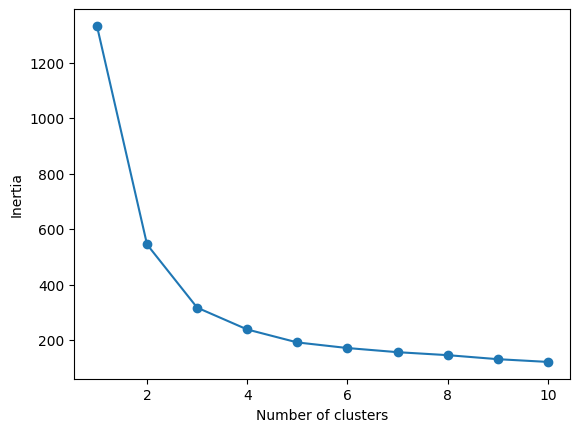

In [ ]:
# create an empty list to store the inertia values
inertia = []

# create a range of k values to test
k_range = range(1, 11)

# fit KMeans for each k value and append the inertia to the list
for k in k_range:
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(clustering_df_scaled)
    inertia.append(model.inertia_)

# plot the inertia values against k values
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Metode elbow digunakan untuk menentukan jumlah cluster yang terbaik yang dapat digunakan untuk menghasilkan hasil cluster yang terbaik dan dapat memaksimalkan kualitas hasil cluster.

Pada grafik, terlihat di titik setelah k = 3 tidak mengalami banyak perubahan, jadi cluster terbaik dibagi menjadi 3 label.

## K-Means Clustering

In [ ]:
# instantiate the KMeans model with the selected number of clusters
model = KMeans(n_clusters=3, random_state = 42, n_init='auto')

# fit the model to the scaled data
model.fit(clustering_df_scaled)

# create a new column in the dataframe for the cluster labels
df_cluster['cluster'] = model.labels_

In [ ]:
df_cluster

,CustomerID,TransactionID,Qty,TotalAmount,cluster
0,1,17,60,623300,2
1,2,13,57,392300,2
2,3,15,56,446200,2
3,4,10,46,302500,1
4,5,7,27,268600,0
...,...,...,...,...,...
439,442,13,37,269400,1
440,444,18,62,577700,2
441,445,18,68,587200,2
442,446,11,42,423300,1


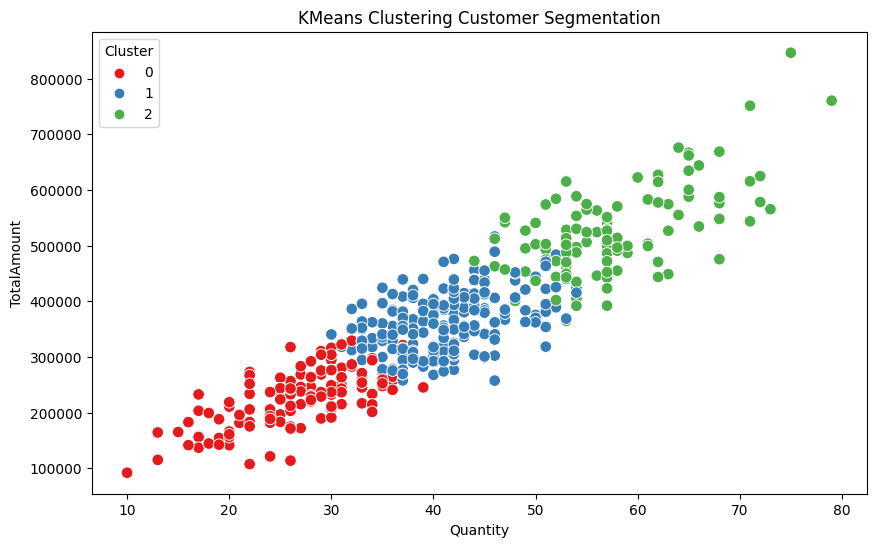

In [ ]:
# Convert 'cluster' column to categorical data type
df_cluster['cluster'] = df_cluster['cluster'].astype('category')

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Qty', y='TotalAmount', data=df_cluster, hue='cluster', palette='Set1', s=70)
plt.xlabel('Quantity')
plt.ylabel('TotalAmount')
plt.title('KMeans Clustering Customer Segmentation')
plt.legend(title='Cluster')
plt.show()

In [ ]:
df_cluster.groupby(['cluster']).agg({
    'CustomerID': 'count',
    'TransactionID': 'mean',
    'Qty': 'mean',
    'TotalAmount' : 'mean'
})

,CustomerID,TransactionID,Qty,TotalAmount
cluster,,,,
0,135,7.785185,26.933333,229388.888889
1,202,11.282178,41.188119,363267.326733
2,107,15.383178,57.654206,525431.775701


## Interpretasi Data

Berdasarkan hasil clustering, dapat diidentifikasi 3 kelompok pelanggan yang berbeda berdasarkan karakteristik pembelian mereka :

**Cluster 0 (Bronze Buyer)**
*   Jumlah Pelanggan: 135
*   Rata-rata Jumlah Transaksi: 7
*   Rata-rata Jumlah Barang Terjual (Qty): 26
*   Rata-rata Pendapatan (TotalAmount): Rp. 229,388,000

Cluster ini memiliki transaksi, jumlah barang terjual, dan pembelian
**terkecil** dibandingkan cluster lainnya. Kelompok ini cenderung melakukan **pembelian dalam jumlah kecil** dan **frekuensi kecil**. Cluster ini didefinisikan sebagai **Bronze Buyer**.


**Cluster 1 (Silver Buyer)**
*   Jumlah Pelanggan: 202
*   Rata-rata Jumlah Transaksi: 11
*   Rata-rata Jumlah Barang Terjual (Qty): 41
*   Rata-rata Pendapatan (TotalAmount): Rp. 363,267,000

Cluster ini memiliki transaksi, jumlah barang terjual, dan pembelian dalam jumlah **menengah**. Tidak sekecil cluster 0 dan tidak sebesar cluster 2. Cluster ini didefinisikan sebagai **Silver Buyer**.

**Cluster 2 (Gold Buyer)**
*   Jumlah Pelanggan: 107
*   Rata-rata Jumlah Transaksi: 15
*   Rata-rata Jumlah Barang Terjual (Qty): 57
*   Rata-rata Pendapatan (TotalAmount): Rp. 525,431,000

Cluster ini mempunyai rata-rata **transaksi tertinggi**, rata-rata **kuantitas pembelian produk tertinggi**, dan rata-rata **total pembelian terbesar** dibandingkan cluster lainnya. Kelompok ini didefinisikan sebagai **Gold Buyer**.

## Rekomendasi

**Cluster 0 (Bronze Buyer)** <br>
Cluster ini memiliki transaksi, jumlah barang terjual, dan pembelian terkecil dibandingkan cluster lainnya. Oleh karena itu, kami ingin memberikan insentif kepada Cluster 0 agar berbelanja lebih sering, seperti:
*   **Diskon Produk:** Memberi diskon khusus untuk produk-produk tertentu kepada pelanggan dalam kelompok ini. Ini mungkin membantu menarik perhatian mereka untuk melakukan pembelian lebih besar.
*   **Pengiriman Gratis:** Memberi pengiriman gratis untuk pesanan di atas batas tertentu. Ini dapat mendorong pelanggan dalam kelompok ini untuk menambah item ke keranjang belanjaan mereka.
*   **Diskon Kategori Produk:** Memberikan diskon pada kategori-kategori produk yang sering mereka beli. Ini bisa menjadi produk-produk yang lebih terjangkau.





**Cluster 1 (Silver Buyer)** <br>
Cluster ini memiliki transaksi, jumlah barang terjual, dan pembelian dalam jumlah menengah. Oleh karena itu, kami ingin memberikan beberapa penawaran kepada Cluster 1 karena mereka berpotensi bertransisi menjadi cluster 2 (Gold Buyer), seperti:
*   **Cashback:** Memberikan cashback atau voucher diskon untuk transaksi berikutnya jika mereka mencapai batas pembelian tertentu.
*   **Bundling Produk:** Membuat bundle produk dengan harga khusus. Ini dapat mendorong mereka untuk membeli lebih banyak item dalam satu transaksi.
*   **Promo Produk Baru:** Beri tahu mereka tentang produk baru atau edisi terbatas yang akan segera dirilis.

**Cluster 2 (Gold Buyer)** <br>
Cluster ini memiliki transaksi, jumlah barang terjual, dan pembelian terbesar dibandingkan cluster lainnya. Oleh karena itu, kami ingin mempertahankan keterlibatan cluster Gold Buyer ini, atau bahkan lebih. Beberapa kemungkinan strategi untuk mempertahankan cluster ini adalah:
*   **Diskon Besar:** Menawarkan diskon besar untuk produk-produk berkualitas tinggi atau kategori-kategori premium yang mungkin menarik bagi mereka.
*   **Layanan Premium:** Menawarkan layanan pelanggan premium seperti pengiriman ekspres atau akses awal ke penawaran eksklusif.
*   **Program Loyalitas:** Mengajak mereka untuk bergabung dengan program loyalitas yang memberikan poin atau hadiah spesial untuk setiap transaksi.

